# 🧠 Multi-Model Machine Learning Notebook
This notebook demonstrates several machine learning algorithms (KMeans, Logistic Regression, Decision Tree, Random Forest, SVM) using the Iris dataset.

In [41]:

# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

np.random.seed(42)


In [42]:
from sklearn.datasets import make_classification

# Generate a synthetic classification dataset
X, y = make_classification(
    n_samples=500,       # number of samples
    n_features=10,       # total number of features
    n_informative=5,     # number of informative features
    n_redundant=2,       # number of redundant features
    n_classes=3,         # number of classes
    random_state=42      # for reproducibility
)

# Create feature names dynamically
feature_names = [f"feature_{i}" for i in range(X.shape[1])]

# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y

# Display dataset info
print(f"Shape of dataset: {df.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Unique target classes: {np.unique(y)}")

# Show the first few rows
df.head()

Shape of dataset: (500, 11)
Number of features: 10
Unique target classes: [0 1 2]


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,-0.276320,-2.963594,3.667779,-2.063303,-1.256963,-1.122153,-0.756444,1.872198,-0.816038,0.497937,2
1,-0.116510,-1.307850,-0.620535,-0.605216,-0.204580,-0.930664,1.115350,-3.078705,1.664802,-3.197971,1
2,-2.256250,2.980471,-0.768651,2.359745,-0.658595,-0.579045,3.313295,4.833280,-1.178440,1.513542,2
3,-0.087256,-1.075654,1.139018,-0.447514,-0.385106,1.164583,0.962627,0.267886,0.853421,-1.067666,2
4,1.507634,-3.801445,-0.331507,1.757233,-0.406608,-0.085608,0.841192,-0.810027,-0.692152,-0.125343,1


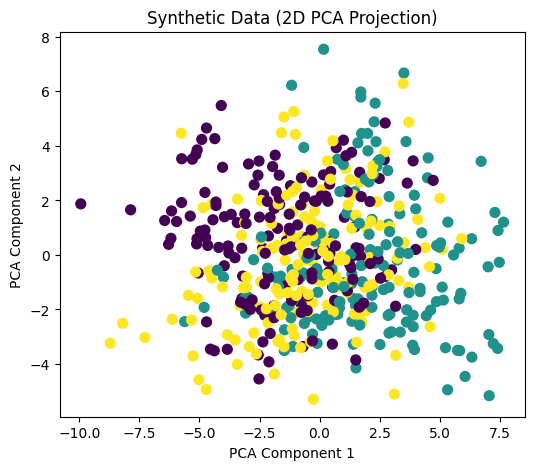

In [43]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Synthetic Data (2D PCA Projection)")
plt.show()

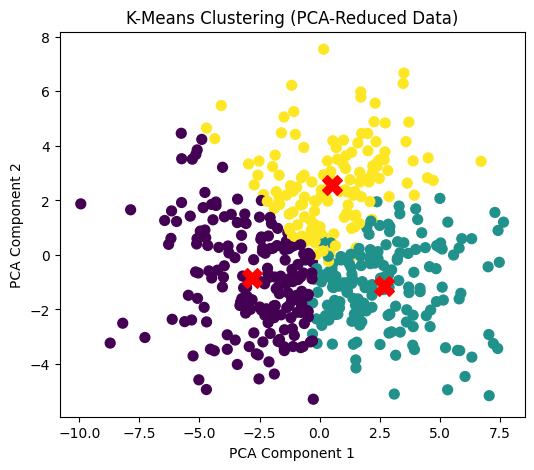

In [44]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

centers_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering (PCA-Reduced Data)")
plt.show()


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [46]:
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.6933333333333334
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        46
           1       0.73      0.85      0.79        55
           2       0.56      0.39      0.46        49

    accuracy                           0.69       150
   macro avg       0.67      0.69      0.67       150
weighted avg       0.68      0.69      0.68       150



In [47]:
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree Accuracy: 0.76
Confusion Matrix:
 [[39  5  2]
 [ 5 43  7]
 [ 8  9 32]]


In [48]:
forest_model = RandomForestClassifier(n_estimators=100)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))


Random Forest Accuracy: 0.82


In [49]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.8533333333333334


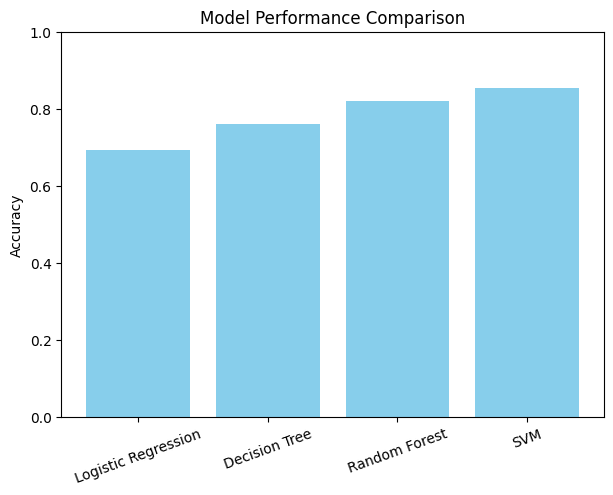

In [50]:
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Decision Tree": accuracy_score(y_test, y_pred_tree),
    "Random Forest": accuracy_score(y_test, y_pred_forest),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

plt.figure(figsize=(7,5))
plt.bar(results_df["Model"], results_df["Accuracy"], color="skyblue")
plt.ylim(0, 1.0)
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.show()
